# Make GWP figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 90 and 50 Tg/y

In [1]:
filepath= r"./output/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import matplotlib.patches as mpatches
from matplotlib import gridspec
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))
plt.rcParams['figure.dpi'] = 300

## Hydrogen GWP
We read in and plot the GWP values of hydrogen through changes in methane lifetime, changes in ozone concentration both directly from hydrogen reactions and indirectly from methane changes, and changes in stratospheric water vapour, also both from direct production from hydrogen and induced via changes in methane concentrations. Bar plots show how the various contributions contribute to the total GWP value in each of the models.

In [3]:
tittel = 'H2 GWP'
ytittel ='GWP'

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=default_size)

#Defining some colors:
CH4_color = "lightseagreen"
O3_color = "gold"
H2O_color = "darkviolet"
H2_color = 'lightblue'

#Defining some legend looks:
CH4_legend = mpatches.Patch( facecolor=CH4_color,label='CH4')
O3_legend= mpatches.Patch( facecolor=O3_color, label='O3')
H2O_legend= mpatches.Patch( facecolor=H2O_color, label='strat H2O')


model_dict = { 'GFDL_nudge':'GFDL',
               'OSLOCTM3':'OsloCTM',
               'INCA':'INCA',
               'UKCA':'UKCA',
               'WACCM6-2deg':'WACCM',
               'GFDL-emi':'GFDL-emi',
               'OSLOCTM3-emi':'OsloCTM-emi'
             }

sorted_array = ['GFDL','INCA','OsloCTM','UKCA','WACCM','GFDL-emi','OsloCTM-emi']


starplot = False

In [4]:
df_table_gwp = pd.read_csv(filepath+'table_h2_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)
df_table_gwp

,GFDL-emi,GFDL,INCA,OsloCTM,OsloCTM-emi,UKCA,WACCM
O3,4.34,2.34,1.64,nan,2.43,1.85,1.97
strat H2O,2.80,1.80,1.27,nan,1.90,nan,0.58
O3 CH4ind,nan,2.35,1.53,nan,2.80,nan,3.13
strat H2O CH4ind,nan,1.41,0.46,nan,0.65,nan,0.28
CH4dir,4.30,3.52,3.56,nan,4.79,nan,3.29
CH4indir,nan,1.40,1.29,nan,nan,nan,1.82


In [5]:
df_drydep_best_table_gwp = pd.read_csv(filepath+'drydep_59_table_h2_gwp.csv',index_col=0)
df_drydep_best_table_gwp.rename(columns=model_dict, inplace=True)
df_drydep_best_table_gwp


,GFDL-emi,GFDL,INCA,OsloCTM,OsloCTM-emi,UKCA,WACCM
O3,4.09,2.27,1.49,2.45,2.47,1.53,2.29
strat H2O,2.64,1.74,1.16,1.95,1.96,nan,0.67
O3 CH4ind,nan,2.28,1.40,2.86,2.89,1.65,3.64
strat H2O CH4ind,nan,1.36,0.42,0.71,0.71,nan,0.32
CH4dir,4.06,3.41,3.24,3.33,4.92,3.27,3.82
CH4indir,nan,1.36,1.18,1.55,nan,1.46,2.12


In [6]:
total_drydep_best = df_drydep_best_table_gwp.sum()
total_drydep_best

GFDL-emi      10.8
GFDL          12.4
INCA          8.90
OsloCTM       12.8
OsloCTM-emi   13.0
UKCA          7.91
WACCM         12.9
dtype: float64

In [7]:
#Sort indexes
df_table_gwp = df_table_gwp.reindex(['CH4dir','CH4indir', 'O3', 'O3 CH4ind', 'strat H2O', 'strat H2O CH4ind'])

df_table_gwp = df_table_gwp[sorted_array]
df_table_gwp

,GFDL,INCA,OsloCTM,UKCA,WACCM,GFDL-emi,OsloCTM-emi
CH4dir,3.52,3.56,nan,nan,3.29,4.30,4.79
CH4indir,1.40,1.29,nan,nan,1.82,nan,nan
O3,2.34,1.64,nan,1.85,1.97,4.34,2.43
O3 CH4ind,2.35,1.53,nan,nan,3.13,nan,2.80
strat H2O,1.80,1.27,nan,nan,0.58,2.80,1.90
strat H2O CH4ind,1.41,0.46,nan,nan,0.28,nan,0.65


In [8]:
df_table_gwp_simple = df_table_gwp.fillna(0.0)
df_table_gwp_simple.loc['CH4'] = df_table_gwp_simple.loc['CH4dir']+df_table_gwp_simple.loc['CH4indir']
df_table_gwp_simple.loc['O3'] = df_table_gwp_simple.loc['O3 CH4ind']+df_table_gwp_simple.loc['O3']
df_table_gwp_simple.loc['strat H2O'] = df_table_gwp_simple.loc['strat H2O']+df_table_gwp_simple.loc['strat H2O CH4ind']


df_table_gwp_simple.replace(0, np.nan, inplace=True)
df_table_gwp_simple = df_table_gwp_simple.drop(['CH4dir','CH4indir','strat H2O CH4ind','O3 CH4ind'])
df_table_gwp_simple


,GFDL,INCA,OsloCTM,UKCA,WACCM,GFDL-emi,OsloCTM-emi
O3,4.69,3.17,nan,1.85,5.10,4.34,5.22
strat H2O,3.21,1.73,nan,nan,0.85,2.80,2.55
CH4,4.92,4.85,nan,nan,5.11,4.30,4.79


In [9]:
#Best estimate, resetting all models with the same drydep values.

df_table_gwp_best_estimate = df_drydep_best_table_gwp.fillna(0.0)
df_table_gwp_best_estimate.loc['CH4'] = df_table_gwp_best_estimate.loc['CH4dir']+df_table_gwp_best_estimate.loc['CH4indir']
df_table_gwp_best_estimate.loc['O3'] = df_table_gwp_best_estimate.loc['O3 CH4ind']+df_table_gwp_best_estimate.loc['O3']
df_table_gwp_best_estimate.loc['strat H2O'] = df_table_gwp_best_estimate.loc['strat H2O']+df_table_gwp_best_estimate.loc['strat H2O CH4ind']


df_table_gwp_best_estimate = df_table_gwp_best_estimate.drop(['CH4dir','CH4indir','strat H2O CH4ind','O3 CH4ind'])

df_table_gwp_best_estimate.replace(0, np.nan, inplace=True)

#Drop GFDL-emi and OsloCTM-emi in model mean
df_table_gwp_best_estimate = df_table_gwp_best_estimate.drop(['OsloCTM-emi','GFDL-emi'],axis=1)
df_table_gwp_best_estimate['Model mean'] = df_table_gwp_best_estimate.mean(axis=1)

df_table_gwp_best_estimate.loc['Total'] = df_table_gwp_best_estimate.sum()

df_table_gwp_best_estimate

,GFDL,INCA,OsloCTM,UKCA,WACCM,Model mean
O3,4.55,2.89,5.32,3.18,5.93,4.37
strat H2O,3.11,1.58,2.65,nan,0.99,2.08
CH4,4.77,4.42,4.88,4.73,5.94,4.95
Total,12.4,8.90,12.8,7.91,12.9,11.4


In [10]:
#GWP table to manuscript:
#Reread:
df_table_gwp_model_mean = df_table_gwp.fillna(0.0)

#df_gwp_table_to_manuscript = pd.DataFrame(columns=['CH4','O3','O3 CH4ind [%]','Strat H2O','Strat H2O CH4ind [%]'], index=sorted_array)
df_gwp_table_to_manuscript = pd.DataFrame(columns=['CH4','O3','Strat H2O'], index=sorted_array)
df_gwp_table_to_manuscript['CH4'] = df_table_gwp_model_mean.loc['CH4dir']+df_table_gwp_model_mean.loc['CH4indir']
df_gwp_table_to_manuscript['O3'] = df_table_gwp_model_mean.loc['O3 CH4ind']+df_table_gwp_model_mean.loc['O3']
df_gwp_table_to_manuscript['Strat H2O'] = df_table_gwp_model_mean.loc['strat H2O']+df_table_gwp_model_mean.loc['strat H2O CH4ind']
#df_gwp_table_to_manuscript['O3 CH4ind [%]'] = df_table_gwp_model_mean.loc['O3 CH4ind']/df_gwp_table_to_manuscript['O3']*100.0
#df_gwp_table_to_manuscript['Strat H2O CH4ind [%]'] = df_table_gwp_model_mean.loc['strat H2O CH4ind']/df_gwp_table_to_manuscript['Strat H2O']*100.0


df_gwp_table_to_manuscript.replace(0,np.nan, inplace=True)


df_gwp_table_to_manuscript.loc['Model mean'] = df_gwp_table_to_manuscript.drop(['GFDL-emi','OsloCTM-emi']).mean()

df_gwp_table_to_manuscript.loc['Best estimate'] = df_gwp_table_to_manuscript.loc['Model mean']*np.nan
df_gwp_table_to_manuscript['CH4'].loc['Best estimate'] =df_table_gwp_best_estimate['Model mean'].loc['CH4']
df_gwp_table_to_manuscript['O3'].loc['Best estimate'] =df_table_gwp_best_estimate['Model mean'].loc['O3']
df_gwp_table_to_manuscript['Strat H2O'].loc['Best estimate'] =df_table_gwp_best_estimate['Model mean'].loc['strat H2O']
df_gwp_table_to_manuscript['Total'] = df_gwp_table_to_manuscript[['CH4','O3','Strat H2O']].sum(axis=1)
df_gwp_table_to_manuscript

,CH4,O3,Strat H2O,Total
GFDL,4.92,4.69,3.21,12.8
INCA,4.85,3.17,1.73,9.76
OsloCTM,nan,nan,nan,0.00
UKCA,nan,1.85,nan,1.85
WACCM,5.11,5.10,0.85,11.1
GFDL-emi,4.30,4.34,2.80,11.4
OsloCTM-emi,4.79,5.22,2.55,12.6
Model mean,4.96,3.70,1.93,10.6
Best estimate,4.95,4.37,2.08,11.4


In [11]:
df_table_gwp_simple=df_table_gwp_simple.sort_index()
df_table_gwp_simple

,GFDL,INCA,OsloCTM,UKCA,WACCM,GFDL-emi,OsloCTM-emi
CH4,4.92,4.85,nan,nan,5.11,4.30,4.79
O3,4.69,3.17,nan,1.85,5.10,4.34,5.22
strat H2O,3.21,1.73,nan,nan,0.85,2.80,2.55


O3          4.37
strat H2O   2.08
CH4         4.95
Total       11.4
Name: Model mean, dtype: float64


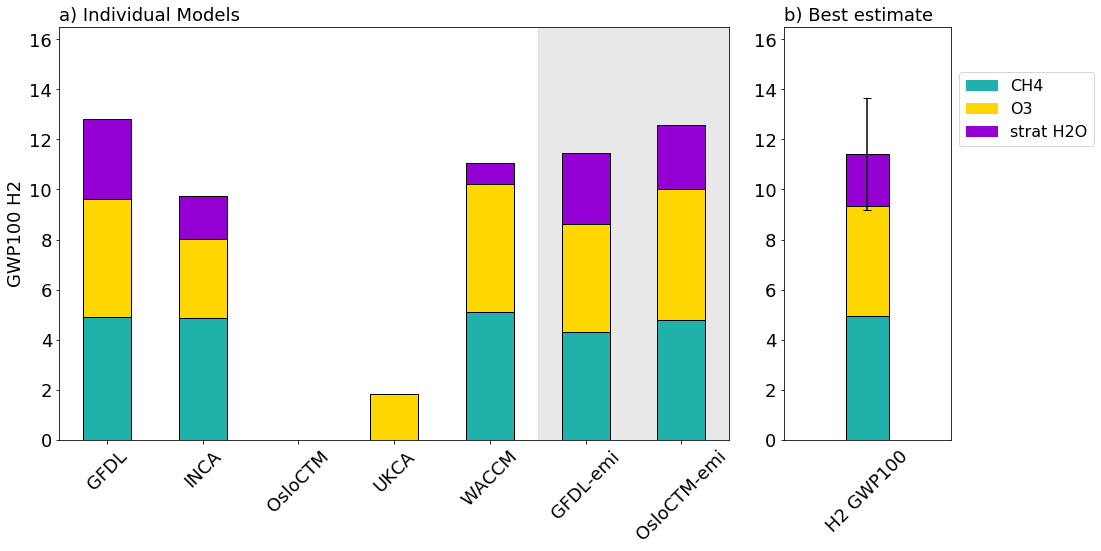

In [12]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(15,8),sharey=True)

gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
axs = plt.subplot(gs[0])


df_table_gwp_simple.T.plot.bar(stacked=True,
                        color=[CH4_color,O3_color, H2O_color],
                        edgecolor='black',
                        ax=axs, 
                        legend = False) 

#print(df_table_gwp_simple.columns)

for m,model in enumerate(df_table_gwp_simple.drop(['GFDL-emi', 'OsloCTM-emi'],axis=1).columns):

        if starplot: star,=axs.plot(m,df_table_gwp_best_estimate[model].loc['Total'],color='darkgray',
                       markersize=10,marker='*',linestyle = 'None',label='Harmonized soil sink')
   
#    axs.plot(m,total_drydep_max.loc[model],#

    
#    axs.plot(m,total_drydep_min.loc[model],marker='v',color='black')
#    axs.plot([m,m],[total_drydep_min.loc[model],total_drydep_max.loc[model]],color='black')


axs.axvspan(4.5, 7, alpha=0.5, color='lightgray',zorder=-10)
axs.set_title('a) Individual Models',loc='left')
#bars = [thing for thing in axs.containers if isinstance(thing,mpl.container.BarContainer)]
#i = 0
#
#for b,bar in enumerate(bars):    
#    for p,patch in enumerate(bar):
#        if b == 1 : 
#            patch.set_hatch('\\')
#        if b == 3 : 
#            patch.set_hatch('\\')
#        if b == 5 : 
#            patch.set_hatch('\\')
#        i = i + 1



axs.set_ylabel('GWP100 H2')
plt.ylim((0,16.5))
plt.xticks(rotation = 45)
#axs.set_xticks(rotation=25, horizontalalignment="center")

axs = plt.subplot(gs[1])
x = ['', 'H2 GWP100', ' ']
y1 = [0,df_table_gwp_best_estimate['Model mean']['CH4'],0]
y2 = [0,df_table_gwp_best_estimate['Model mean']['O3'],0]
helpy = [0,df_table_gwp_best_estimate['Model mean']['CH4']+df_table_gwp_best_estimate['Model mean']['O3'],0]
y3 = [0,df_table_gwp_best_estimate['Model mean']['strat H2O'],0]
print(df_table_gwp_best_estimate['Model mean'])
plt.bar(x, y1,color=CH4_color, width = 0.8, edgecolor='black', )
plt.bar(x, y2,color=O3_color, bottom = y1, width = 0.8, edgecolor='black')
plt.bar(x, y3,color=H2O_color, bottom = helpy, width = 0.8, edgecolor='black')

#plt.plot(1,df_table_gwp_best_estimate['Model mean'].loc['Total'],'*')
plt.errorbar(1, df_table_gwp_best_estimate['Model mean'].loc['Total'], yerr=2.2446, color='black',capsize=4)
#df_table_gwp_best_estimate['Model mean'].drop('Total').T.plot.bar(stacked=True,
#                        color=[CH4_color,O3_color,  H2O_color],
#                        edgecolor='black',
#                        ax=axs, legend=False) 
plt.ylim((0,16.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) 
#plt.xlim((0.4,0.6))
# Shrink current axis by 20%
box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
if starplot:
    axs.legend(loc='center left', bbox_to_anchor=(1, 0.8),handles = [CH4_legend, O3_legend,  H2O_legend, star])   
else:
    axs.legend(loc='center left', bbox_to_anchor=(1, 0.8),handles = [CH4_legend, O3_legend,  H2O_legend])  
axs.set_title('b) Best estimate',loc='left')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('output/Hydrogen_GWP.png', transparent=True)

#df_table_gwp_best_estimate['Model mean']

## Methane GWP
The same exercise is repeated for methane GWP, including also feedbacks through hydrogen. Here we include the AR6 values for methane GWP for comparison.

In [13]:
df_table_gwp = pd.read_csv(filepath+'table_ch4_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)


In [14]:
#IPCC range from AR6
#Table 7.SM.8 | Estimated uncertainty in the global warming potential (GWP) and global temperature-change potential 
#(GTP) for CH4 showing the total uncertainty as a percentage of the best estimate (expressed as 5–95% confidence interval), 
#and the uncertainty by component of the total emission metric calculation (radiative efficiency, chemistry feedbacks, 
#atmospheric lifetime, CO2 (combined uncertainty in radiative efficiency and CO2 impulse response)), carbon cycle response, 
#fate of oxidized fossil methane, and impulse-response function.

#GWP-100
#Percentage Uncertainty in the Metric Best Estimate Due to
#Radiative Efficiency (%)
re = 20
#Chemical Response (%)
cr = 14
#Lifetime (%) 
lt = 14
#CO2 (%) 
co2 =  26
#Carbon Cycle (%)
cc = 5
#Fossil Fuel Oxidation (%)
fo = 7
#Total Uncertainty (%)
tot = 40

unc = np.array([re,cr,lt,co2,cc])#,fo])
unc_power = np.power(unc,2)
print(unc_power)
unc_power_sum = unc_power.sum()
print(unc_power_sum)
print(np.sqrt(unc_power_sum))
print(tot)

GWP100_AR6 = 29.8
GWP100_AR6_unc = 29.8*tot/100.0


unc = np.array([re,cr,lt])
#unc = np.array([cr,lt])
unc_power = np.power(unc,2)
#print(unc_power)
unc_power_sum = unc_power.sum()
#print(unc_power_sum)
#print(np.sqrt(unc_power_sum))
tot_alt = np.sqrt(unc_power_sum)

GWP100_AR6 = 27.0
GWP100_AR6_unc_alt = 27.0*tot_alt/100.0

#totsq = re^2 + cr^2 + lt^2 + co2^2 + cc^2 + fo^2 
#print(totsq)
#print(np.sqrt(totsq))


#print(GWP100_AR6_unc)
#print(GWP100_AR6_unc_alt)

[400 196 196 676  25]
1493
38.63935817272331
40


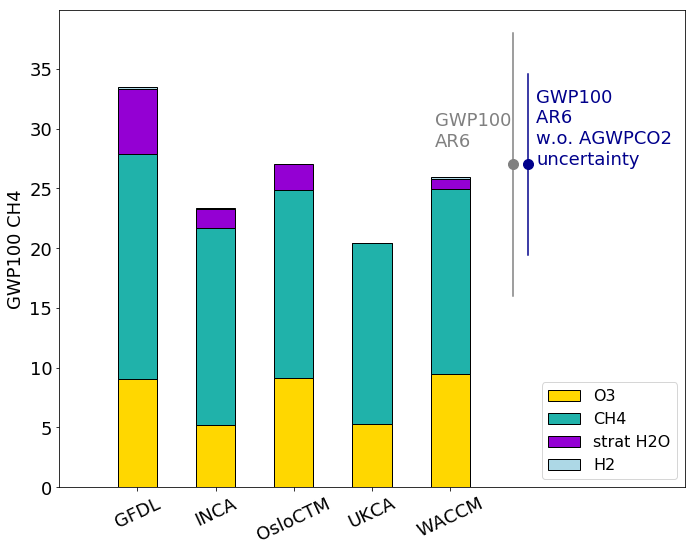

In [15]:
df_table_gwp = df_table_gwp.drop(['OsloCTM-emi'],axis=1)

fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10,8))
df_table_gwp.T.plot.bar(stacked=True,
                        color=[O3_color, CH4_color, H2O_color, H2_color],
                        #color={"O3": 'C1', "CH4": 'C2',"strat H2O":'C4',"H2":'C5'},
                        edgecolor='black',ax=axs) 
#It is the non-fossil GWP that is relevant to compare to.
#axs.plot([4.8,4.8],[29.8-11 ,29.8+11 ],color='black')
#axs.text(4.4,29.8,'GWP100 \nAR6 fossil')
axs.plot([4.8,4.8],[27.0-11 ,27.0+11 ],color='gray')
axs.plot([5,5],[27.0-GWP100_AR6_unc_alt ,27.0+GWP100_AR6_unc_alt ],color='darkblue')
axs.plot(4.8,27.0,'o',markersize=10,color='gray')
axs.plot(5,27.0,'o',markersize=10,color='darkblue')
axs.text(3.8,28.5,'GWP100 \nAR6',color='gray')
axs.text(5.1,27.0,'GWP100 \nAR6 \nw.o. AGWPCO2 \nuncertainty',color='darkblue')
plt.legend(loc='lower right')
plt.xlim([-1,7])
plt.ylabel('GWP100 CH4')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()    
plt.savefig('output/CH4_GWP.png', transparent=True)

IPCC AR6 uncertainty range: 5-95% Table 7.15 for GWP100 non-fossil fuel methane. Uncertainty range Table 7.SM.8, with and without carbon cycle and CO2 uncertainty range.

In [16]:
df_table_gwp['Model mean']=df_table_gwp.mean(axis=1)


df_table_gwp.loc['Total']=np.nan
df_table_gwp.loc['Total']=df_table_gwp.sum()
df_table_gwp['UKCA'].loc['Total']=np.nan

df_table_gwp

,GFDL,INCA,OsloCTM,UKCA,WACCM,Model mean
O3,9.02,5.21,9.17,5.27,9.48,7.63
CH4,18.9,16.5,15.7,15.1,15.5,16.3
strat H2O,5.40,1.57,2.14,nan,0.84,2.49
H2,0.16,0.10,0.00,0.03,0.19,0.10
Total,33.5,23.4,27.0,nan,26.0,26.6
